In [1]:
%matplotlib inline

# Imports
import time
import numpy as np
import scipy.stats as stats
#import pprint

import Gambler as G
import eventGenerator as eg

import matplotlib.pyplot as plt
import pandas as pd

# Import widget methods
from IPython.html.widgets import *

/Users/notmike/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [15]:
class model(object):
    
    def __init__(self, numAgents = 100):
        self.agents = []
        self.numAgents = numAgents
        self.event = eg.randomBinary()
        self.data = {}
        
        for i in range(numAgents):
            self.agents.append(G.Gambler())
            
    def run(self, event_type="VarGamB"):
        if event_type == "VarGamB":
            self.event.genVarGamma_beta(0.6, 0.6, 0, 0.2, 0.2, 0.2, plot=True)
            
        print self.event.prices
        
        for agent in self.agents:
            t=0
            self.data["Agent: {0}, Timestep: {1}".format(agent.name, t)] = [t, 0.0, agent.funds, agent.wagers, agent.shares, 
                                                                            agent.getAverage(), agent.mu, agent.sigma]
            for i in self.event.prices:
                t+=1
                agent.decideTrade(i)
                self.data["Agent: {0}, Timestep: {1}".format(agent.name, t)] = [t, i, agent.funds, agent.wagers, agent.shares,
                                                                                agent.getAverage(), agent.mu, agent.sigma]

In [16]:
M = model()

[ 0.26  0.2   0.27  0.59  0.09  0.32  0.36  0.17  0.48  0.24  0.09  0.19
  0.25  0.44  0.26  0.1   0.22  0.19  0.34  0.42  0.16  0.11  0.79  0.26
  0.3   0.28  0.46  0.19  0.24  0.29  0.36  0.1   0.07  0.05  0.16  0.16
  0.22  0.27  0.04  0.26  0.4   0.29  0.62  0.28  0.34  0.57  0.06  0.34
  0.16  0.11  0.26  0.24  0.23  0.41  0.3   0.43  0.63  0.09  0.29  0.09
  0.25  0.36  0.31  0.46  0.07  0.37  0.35  0.13  0.33  0.42  0.18  0.31
  0.19  0.31  0.56  0.14  0.31  0.05  0.27  0.4   0.08  0.39  0.29  0.25
  0.26  0.25  0.34  0.29  0.19  0.13  0.29  0.45  0.17  0.03  0.24  0.14
  0.31  0.19  0.31  0.29  0.  ]


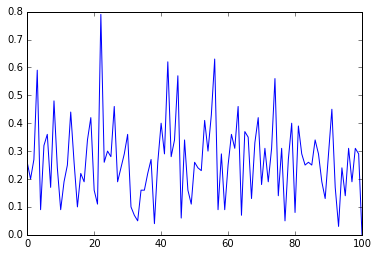

In [17]:
M.run()

In [40]:
df = pd.DataFrame(M.data, index=["Timestep","Price", "Funds","Wagers","Shares","AVG Cost Basis", "mu", "sigma"]).transpose()
df.sort_index()

,Timestep,Price,Funds,Wagers,Shares,AVG Cost Basis,mu,sigma
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 0",0,0,1000,0,0,You're a bum! (you have no skin in the game),0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 1",1,0.26,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 10",10,0.24,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 100",100,0.29,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 101",101,0,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 11",11,0.09,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 12",12,0.19,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 13",13,0.25,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 14",14,0.44,999.74,0,1,0,0.602163,0.253901
"Agent: 03ba7b00-9ab9-4212-8845-f17bbf8ccd35, Timestep: 15",15,0.26,999.74,0,1,0,0.602163,0.253901
